In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def decorateGraph():
    plt.xlabel("x-values")
    plt.ylabel("y-values")
    plt.title("Interesting graph")
    plt.legend()

In [4]:
import csv 

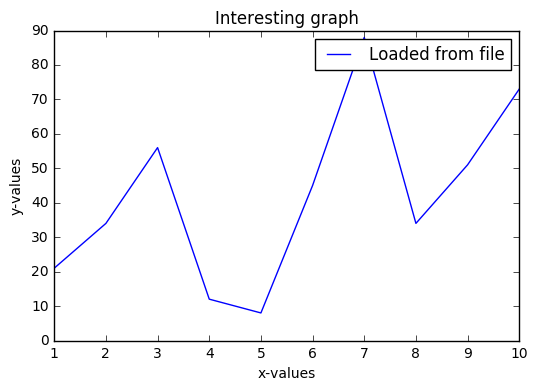

In [5]:
x= []
y= []

with open('example.csv', 'r') as csvfile:
    plots= csv.reader(csvfile, delimiter= ',')
    for row in plots:
        x.append(int(row[0]))
        y.append(int(row[1]))
        
plt.plot(x,y, label= "Loaded from file")

decorateGraph()

In [6]:
import numpy as np

In [7]:
x,y= np.loadtxt('example.csv', delimiter= ',', unpack= True)

In [8]:
print x

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [9]:
print y

[ 21.  34.  56.  12.   8.  45.  88.  34.  51.  73.]


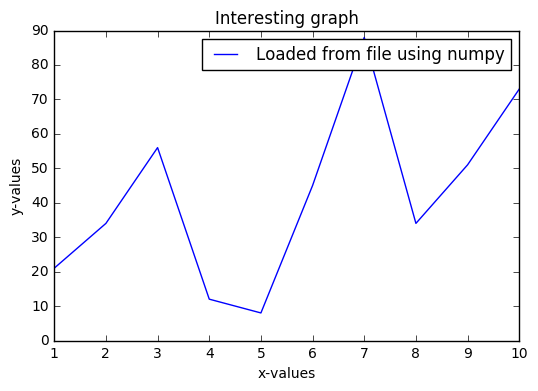

In [10]:
plt.plot(x, y, label= 'Loaded from file using numpy')
decorateGraph()

In [32]:
import urllib2
import matplotlib.dates as mdates

def decorateGraph(x,y,t,p):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.legend(loc=p)

# i dont really get this!
def bytespdate2num(fmt, encoding= 'utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s= b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graphData(stock):    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code= urllib2.urlopen(stock_price_url).read().decode()
    
    stock_data= []
    split_source= source_code.split('\n')
    
    for line in split_source:
        split_line = line.split(',')
        if len(split_line)==6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
    
    date, closep, highp, lowp, openp, volume= np.loadtxt(stock_data, 
                                                         delimiter= ',', 
                                                         unpack= True, 
                                                         converters= {0: bytespdate2num('%Y%m%d')} )
    
    plt.plot_date(date, closep, '-', label= stock + ' stock data')
    decorateGraph('date', 'closing_price', stock+' stock closing prices', 2)

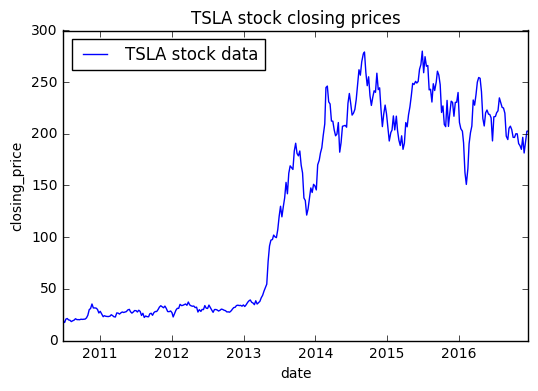

In [33]:
graphData('TSLA') #woohooo!!

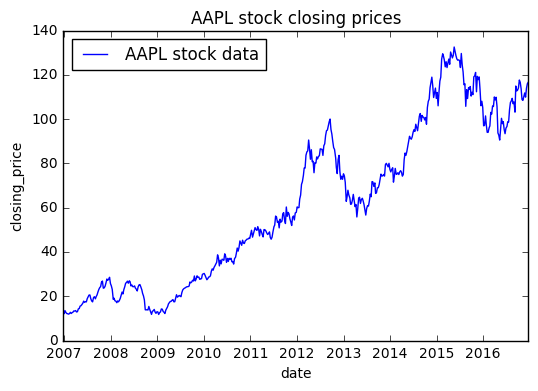

In [34]:
graphData('AAPL')

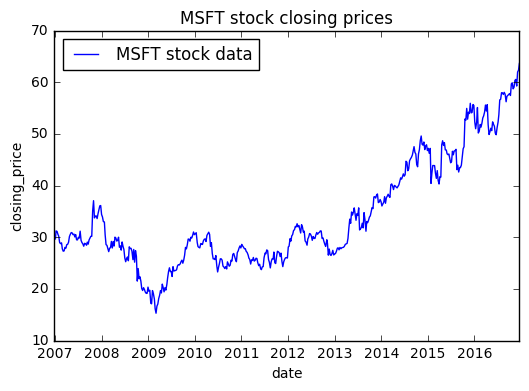

In [35]:
graphData('MSFT')

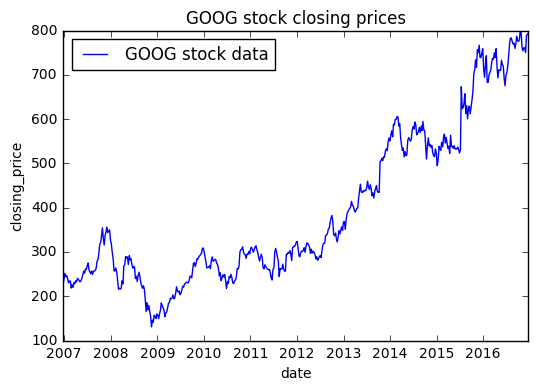

In [36]:
graphData('GOOG')

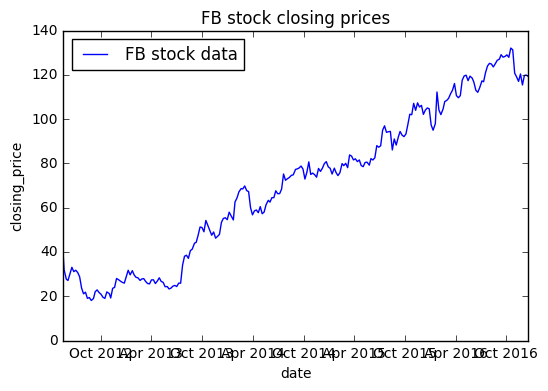

In [37]:
graphData('FB')

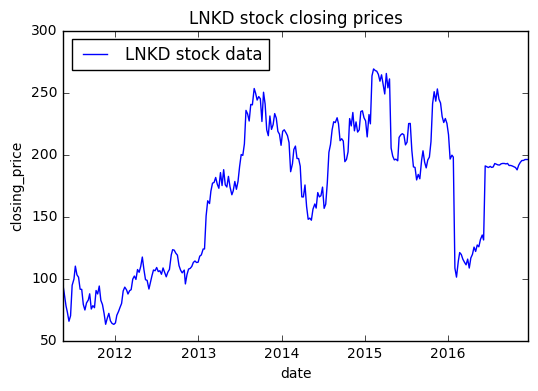

In [38]:
graphData('LNKD')

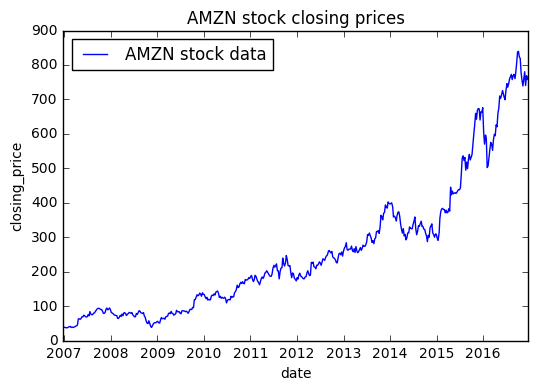

In [41]:
graphData('AMZN')

In [65]:
def graphData(stock):  
    fig = plt.figure()
    ax1= plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code= urllib2.urlopen(stock_price_url).read().decode()
    
    stock_data= []
    split_source= source_code.split('\n')
    
    for line in split_source:
        split_line = line.split(',')
        if len(split_line)==6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)
    
    date, closep, highp, lowp, openp, volume= np.loadtxt(stock_data, 
                                                         delimiter= ',', 
                                                         unpack= True, 
                                                         converters= {0: bytespdate2num('%Y%m%d')} )
    
    ax1.plot_date(date, closep, '-', label= stock + ' stock data')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True) #, color= 'g', linestyle= '-', linewidth= 2)
    
    decorateGraph('date', 'closing_price', stock+' stock closing prices', 2)
    
    plt.subplots_adjust(left= 0.09, bottom= 0.2, right= 0.94, top= 0.9, wspace= 0.2, hspace= 0)

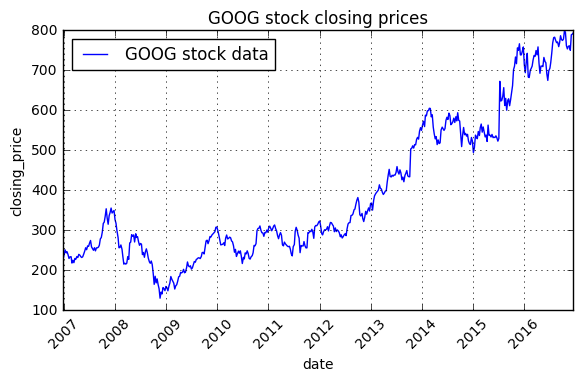

In [66]:
graphData('GOOG')